In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, read, Trace


st1 = read("Mars.mseed")

channels = ['BHZ']

# stream 
st1.filter(type='highpass', freq=0.1)
st1 = st1.select(component='Z')
print(st1)  

#trace 
tr1 = st1[0]
print(tr1)
print(tr1.stats) 
print(tr1.data)

1 Trace(s) in Stream:
XB.ELYSE.02.BHZ | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 samples
XB.ELYSE.02.BHZ | 2021-07-10T13:15:05.019000Z - 2021-07-10T15:15:04.969000Z | 20.0 Hz, 144000 samples
         network: XB
         station: ELYSE
        location: 02
         channel: BHZ
       starttime: 2021-07-10T13:15:05.019000Z
         endtime: 2021-07-10T15:15:04.969000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 144000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 2527, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 512, 'filesize': 3881472})
      processing: ["ObsPy 1.2.2: filter(options={'freq': 0.1}::type='highpass')"]
[  0.00000000e+00  -2.66211743e-16  -1.12578492e-15 ...,   4.48107883e-13
   4.23870154e-13   3.99786089e-13]


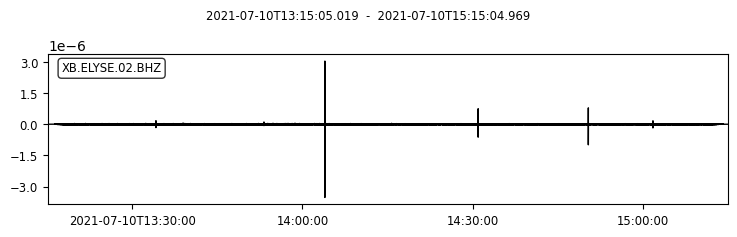

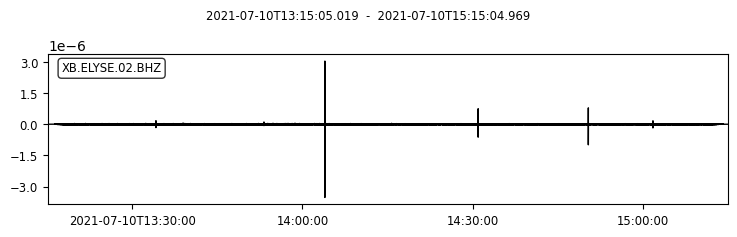

In [2]:
st1.plot()

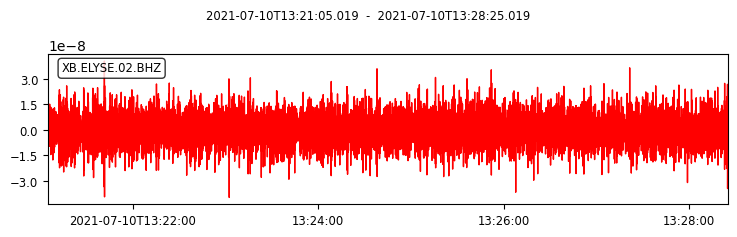

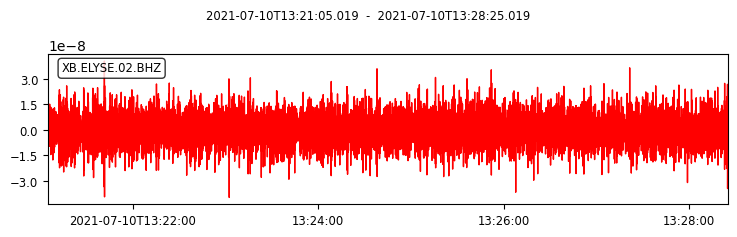

In [3]:
dt = st1[0].stats.starttime
st1.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)

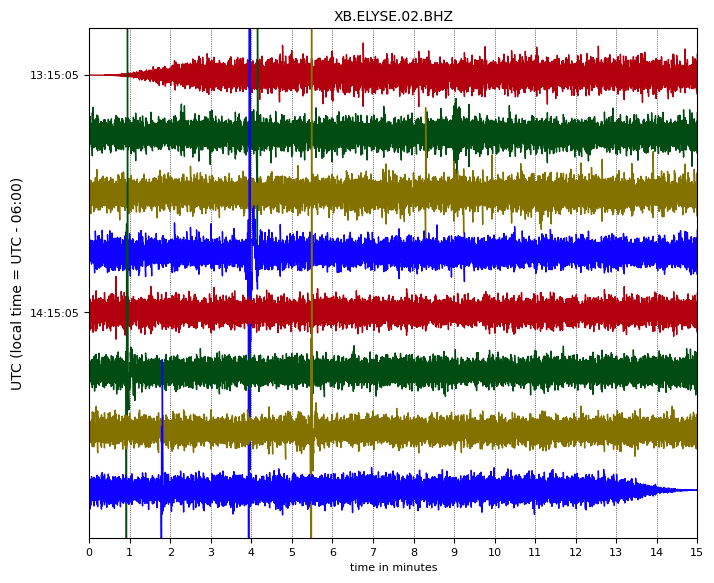

C:\Users\Chloe Locke\anaconda3\lib\site-packages\obspy\imaging\waveform.py:511: UserWarning: Could not download the events because of 'FDSNNoDataException: No data available for request.
Detailed response of server:

'.
  warnings.warn(msg)


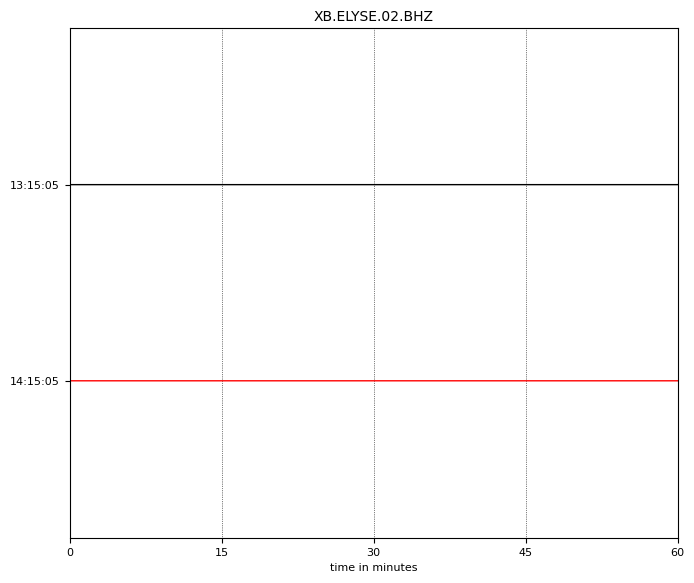

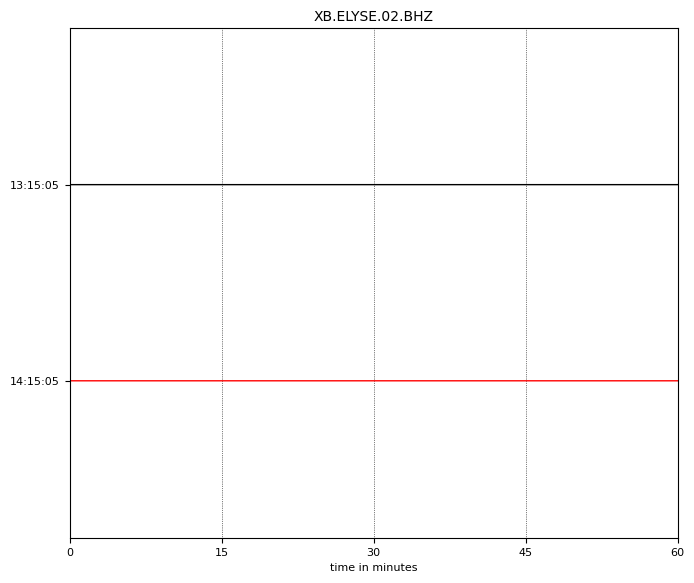

In [4]:
st1.plot(type='dayplot')

st1.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e6, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

In [5]:
import numpy as np

# Read file into string
with open('dataless.xb.elyh0.2019.171.seed', 'r') as st2_file:
    st2_str = st2_file.read()

# Convert string to bytes
st2_bytes = st2_str.encode('latin-1')

# Convert to NumPy character array
data = np.frombuffer(st2_bytes, dtype='|S1')

# Fill header attributes
stats = {'network': 'BW', 'station': 'RJOB', 'location': '',
         'channel': 'WLZ', 'npts': len(data), 'sampling_rate': 0.1,
         'mseed': {'dataquality': 'D'}}


# set current time
stats['starttime'] = UTCDateTime()
st2 = Stream([Trace(data=data, header=stats)])
# write as ASCII file (encoding=0)
st2.write("st2.mseed", format='MSEED', encoding=0, reclen=256)

# Show that it worked, convert NumPy character array back to string
st2 = read("st2.mseed")

#trace 
tr2 = st2[0]
print(tr2)
print(tr2.stats) 
print(tr2.data)

FileNotFoundError: [Errno 2] No such file or directory: 'dataless.xb.elyh0.2019.171.seed'

In [ ]:
st2.plot()
dt = st2[0].stats.starttime
st2.plot(color='red', tick_format='%I:%M %p',
                   starttime= dt + 360 , endtime= dt + 800)

## Day Plots 

